<a href="https://colab.research.google.com/github/JossefaRodriguez/Proyecto-2-_Parte-I/blob/main/EDA_dataset4_realstate_precioVentaPropiedades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2: Análisis Inicial y Selección de Problema

## Búsqueda de Conjuntos de Datos

In [ ]:
# Importar librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
# Conectar con Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar el DataFrame.
path = "/content/drive/MyDrive/Colab Notebooks/DataScience BootCamp/Machine Learning/CORES/CORE6/Real estate.csv"
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Se utiizará el dataset Real State que tiene la siguiente estructura general

Entradas: 414 registros

Columnas: 8 variables

float64: 6 columnas

int64: 2 columnas

- X1 transaction date:	Fecha de transacción
- X2 house age:	Edad de la propiedad
- X3 distance to the nearest MRT station:	Distancia a estación de metro en mt
- X4 number of convenience stores:	Número de tiendas cercanas
- X5 latitude:	Latitud	Coordenada geográfica
- X6 longitude:	Longitud	Coordenada geográfica
- Y house price of unit area: variable objetivo	Precio por unidad de área

In [ ]:
# Se utiliza lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   no                                      414 non-null    int64  
 1   x1_transaction_date                     414 non-null    float64
 2   x2_house_age                            414 non-null    float64
 3   x3_distance_to_the_nearest_mrt_station  414 non-null    float64
 4   x4_number_of_convenience_stores         414 non-null    int64  
 5   x5_latitude                             414 non-null    float64
 6   x6_longitude                            414 non-null    float64
 7   y_house_price_of_unit_area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Análisis Exploratorio de Datos (EDA) Inicial





In [ ]:
# Para mejor visualización se renombrarn las columnas

df.rename(columns={
    'x1_transaction_date': 'transaction_date',
    'x2_house_age': 'house_age',
    'x3_distance_to_the_nearest_mrt_station': 'distance_to_MRT',
    'x4_number_of_convenience_stores': 'convenience_stores',
    'x5_latitude': 'latitude',
    'x6_longitude': 'longitude',
    'y_house_price_of_unit_area': 'price_per_unit_area'
}, inplace=True)

In [ ]:
# Se verifican los cambios
df.columns

Index(['no', 'transaction_date', 'house_age', 'distance_to_MRT',
       'convenience_stores', 'latitude', 'longitude', 'price_per_unit_area'],
      dtype='object')

In [ ]:
# En este punto se eliminará la columna no ya que no aporta
df.drop(columns = 'no', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_date     414 non-null    float64
 1   house_age            414 non-null    float64
 2   distance_to_MRT      414 non-null    float64
 3   convenience_stores   414 non-null    int64  
 4   latitude             414 non-null    float64
 5   longitude            414 non-null    float64
 6   price_per_unit_area  414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [ ]:
# comenzaremos identificando posibles valores nulos
df.isna().sum()

,0
transaction_date,0
house_age,0
distance_to_MRT,0
convenience_stores,0
latitude,0
longitude,0
price_per_unit_area,0


In [ ]:
# verificaremos valores duplicados dentro del dataset
df.duplicated().sum()

np.int64(0)

In [ ]:
# Se toma una muestra aleatoria del dataset para conocer el comportamiento de algunos datos
df.sample(20)

,transaction_date,house_age,distance_to_MRT,convenience_stores,latitude,longitude,price_per_unit_area
367,2012.833,15.0,1828.31900,2,24.96464,121.51531,20.9
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
321,2012.917,16.9,964.74960,4,24.98872,121.53411,37.7
170,2013.333,24.0,4527.68700,0,24.94741,121.49628,14.4
18,2013.417,16.9,368.13630,8,24.96750,121.54451,42.3
270,2013.333,10.8,252.58220,1,24.97460,121.53046,117.5
249,2012.833,18.0,6306.15300,1,24.95743,121.47516,15.0
326,2013.500,4.1,56.47425,7,24.95744,121.53711,62.1
63,2013.583,2.6,533.47620,4,24.97445,121.54765,55.0
368,2013.417,18.2,350.85150,1,24.97544,121.53119,43.1


In [ ]:
# Se detecta que la fecha de transaccion esta en un tipo de dato que no corresponde por ende se procederá a modificar agregando una nueva columna de año y mes
# Crear nuevas columnas de año y mes
df['year_transaction'] = df['transaction_date'].astype(int)
df['month_transaction'] = ((df['transaction_date'] - df['year_transaction']) * 12).round().astype(int)


In [ ]:
df.head()

,transaction_date,house_age,distance_to_MRT,convenience_stores,latitude,longitude,price_per_unit_area,year_transaction,month_transaction
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,7
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10


In [ ]:
df.sample(20)

,transaction_date,house_age,distance_to_MRT,convenience_stores,latitude,longitude,price_per_unit_area,year_transaction,month_transaction
324,2012.667,12.4,1712.63200,2,24.96412,121.51670,31.3,2012,8
237,2013.167,13.0,732.85280,0,24.97668,121.52518,39.0,2013,2
349,2012.750,7.8,104.81010,5,24.96674,121.54067,47.0,2012,9
22,2012.917,14.7,1360.13900,1,24.95204,121.54842,24.6,2012,11
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,2013,0
121,2013.500,13.6,492.23130,5,24.96515,121.53737,48.0,2013,6
279,2013.417,2.6,1554.25000,3,24.97026,121.51642,31.1,2013,5
342,2012.667,5.7,90.45606,9,24.97433,121.54310,53.5,2012,8
288,2013.583,16.6,323.69120,6,24.97841,121.54280,51.0,2013,7
269,2013.000,17.6,837.72330,0,24.96334,121.54767,23.0,2013,0


In [ ]:
# debido a que ya se extrajo la data de fecha de transaccion en columnas separadas, se procederá a borrar la columna original
df.drop(columns='transaction_date', inplace=True)


In [ ]:
#se verifica todo el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   house_age            414 non-null    float64
 1   distance_to_MRT      414 non-null    float64
 2   convenience_stores   414 non-null    int64  
 3   latitude             414 non-null    float64
 4   longitude            414 non-null    float64
 5   price_per_unit_area  414 non-null    float64
 6   year_transaction     414 non-null    int64  
 7   month_transaction    414 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


In [ ]:
# se realizará un analisis estadistico descrptivo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
house_age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
distance_to_MRT,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
convenience_stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
price_per_unit_area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000
year_transaction,414.0,2012.695652,0.460687,2012.00000,2012.000000,2013.00000,2013.000000,2013.00000
month_transaction,414.0,5.439614,3.381330,0.00000,3.000000,5.00000,8.000000,11.00000


####Analisis
- Según esta muestra estadistica podemos determinar que el promedio de edad de las viviendas es de 17.7 años y va entre los rangos de 0 a 43,8 lo que nos indica que existen propiedades nuevas y antiguas
- En cuanto a la distancia de estacion de metros, existe un promedio de 1083 mts, en un rango entre 23.8 y 6488mts, podriamos ver algunos valores atipicos
- En cuanto a las tiendas cercanas, existen en promedio 4 tiendas cercanas en un rango entre 0 y 10.
- El precio por unidad area es de un promedio de 37.98, en un rango entre 7.6 a 117.5, existencia posible de valores atipicos.

In [ ]:
# Se identificaran posibles valores atipicos según lo visualizado en la descripcion estaditica

# Filtrar variables numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular cuartiles e IQR
Q1 = df[columnas_numericas].quantile(0.25)
Q3 = df[columnas_numericas].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers
outliers = (df[columnas_numericas] < (Q1 - 1.5 * IQR)) | (df[columnas_numericas] > (Q3 + 1.5 * IQR))

# Filtrar filas con al menos un outlier
atipicos = df[outliers.any(axis=1)]
atipicos


,house_age,distance_to_MRT,convenience_stores,latitude,longitude,price_per_unit_area,year_transaction,month_transaction
8,31.7,5512.0380,1,24.95095,121.48458,18.8,2013,6
30,25.9,4519.6900,0,24.94826,121.49587,22.1,2013,6
35,13.9,4079.4180,0,25.01459,121.51816,27.3,2013,6
40,13.6,4082.0150,0,24.94155,121.50381,15.9,2013,0
41,16.8,4066.5870,0,24.94297,121.50342,18.2,2013,6
48,24.2,4605.7490,0,24.94684,121.49578,13.4,2013,5
49,29.4,4510.3590,1,24.94925,121.49542,13.2,2012,8
58,30.3,4510.3590,1,24.94925,121.49542,22.6,2013,6
73,13.8,4082.0150,0,24.94155,121.50381,20.0,2013,2
87,16.9,4066.5870,0,24.94297,121.50342,18.3,2013,7


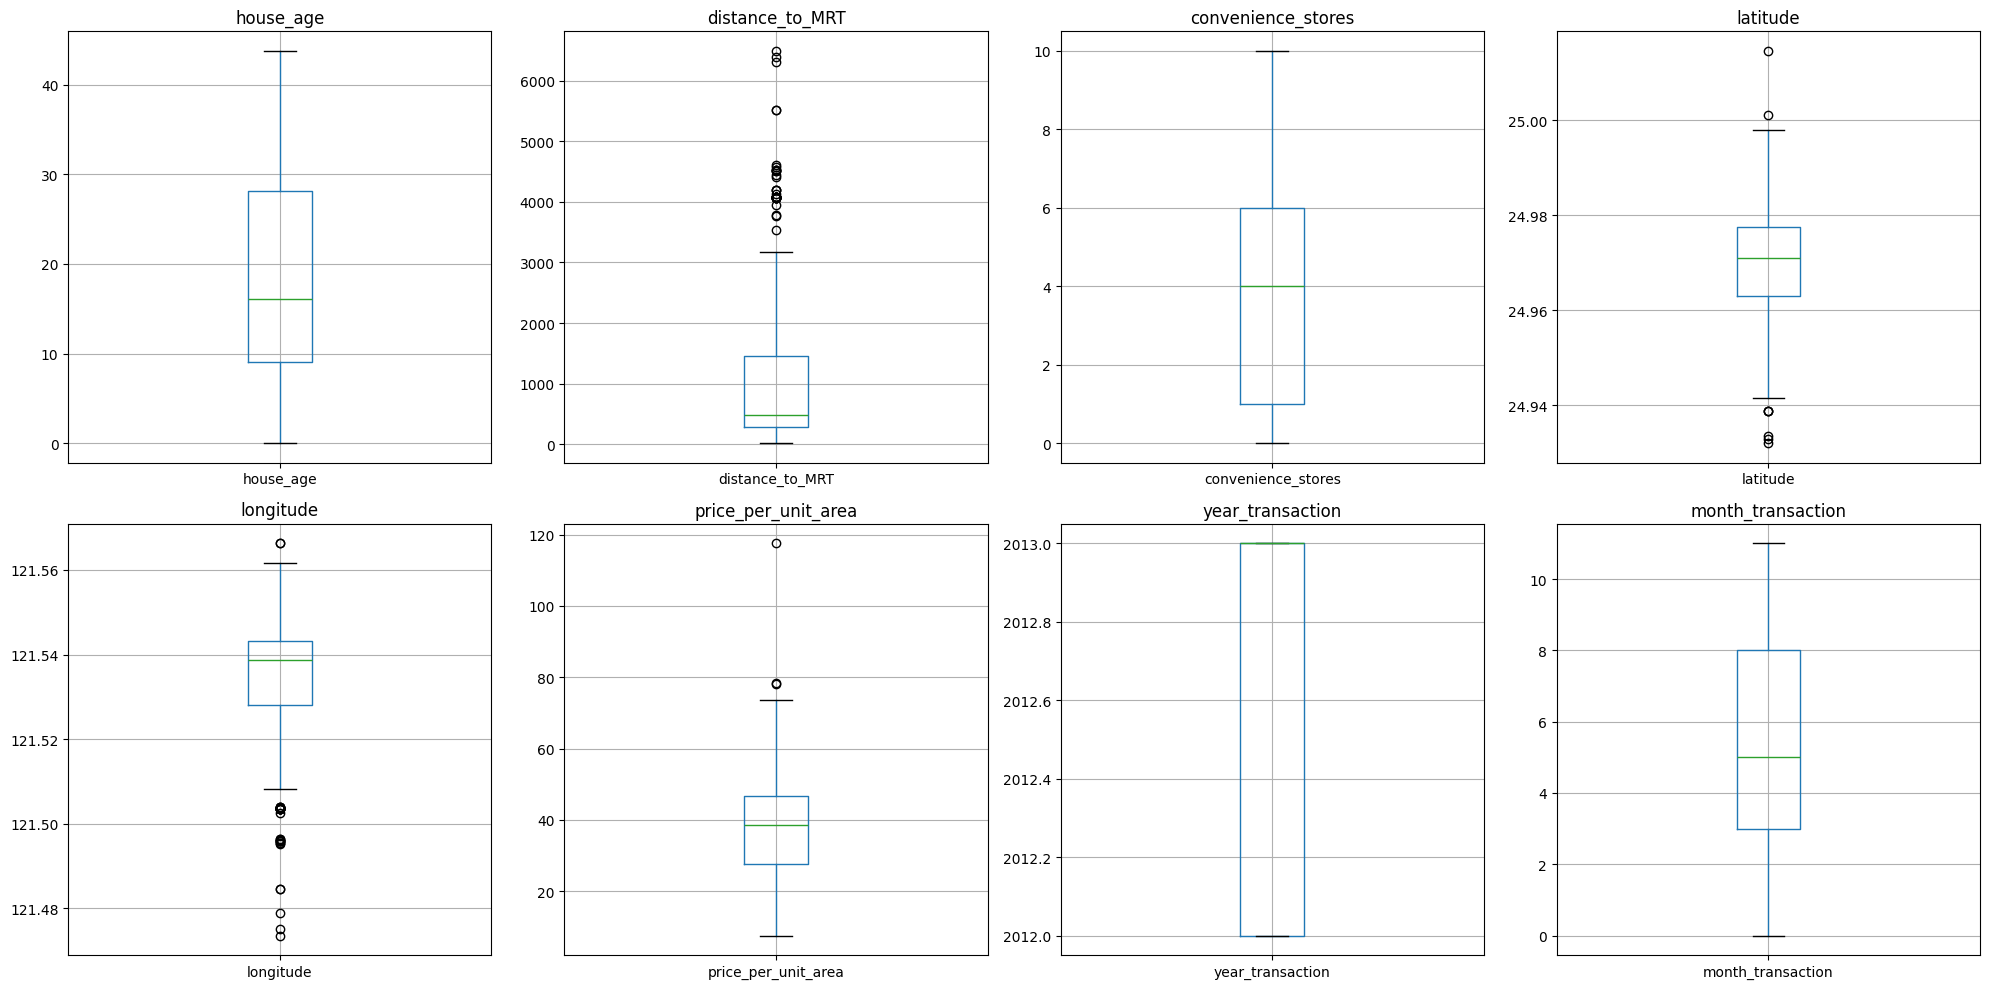

In [ ]:
# Se generaran visualizaciones graficas para analizar los avlores atipicos presentes en las variables numericas

# Lista de columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular número de filas y columnas para la grilla
n_cols = 4
n_rows = int(np.ceil(len(columnas_numericas) / n_cols))

# Se crea figura
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Se grafica cada boxplot
for i, col in enumerate(columnas_numericas):
    df.boxplot(column=col, ax=axes[i], vert=True)
    axes[i].set_title(col)

# Eliminar subplots vacíos si sobran
for j in range(len(columnas_numericas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


####Analisis
- Para el caso de las variables house_age, convenience_store, year_transaction y month_transaction no presentan valores atipicos
- En el caso de la variable distance_to_mrt existe outliers en el extremos superior lo que nos podria indicar que existen propiedades alejadas del metro, por ende no es un valor erroneo si no que existe la posibilidad de su existencia.
- Para latitud y longitud, existen valores atipicos pero son normales en en cuanto a las zonas geograficas, podriamos indicar además que gran parte de las propiedades estan en una zona especifica.
- Para la variable proce_per_unit_area existen valores outliers lo que sugiere propiedades de alto valor.

Se realizará una matriz de correlacion para ver la correlacion que existe entre las variables del dataset

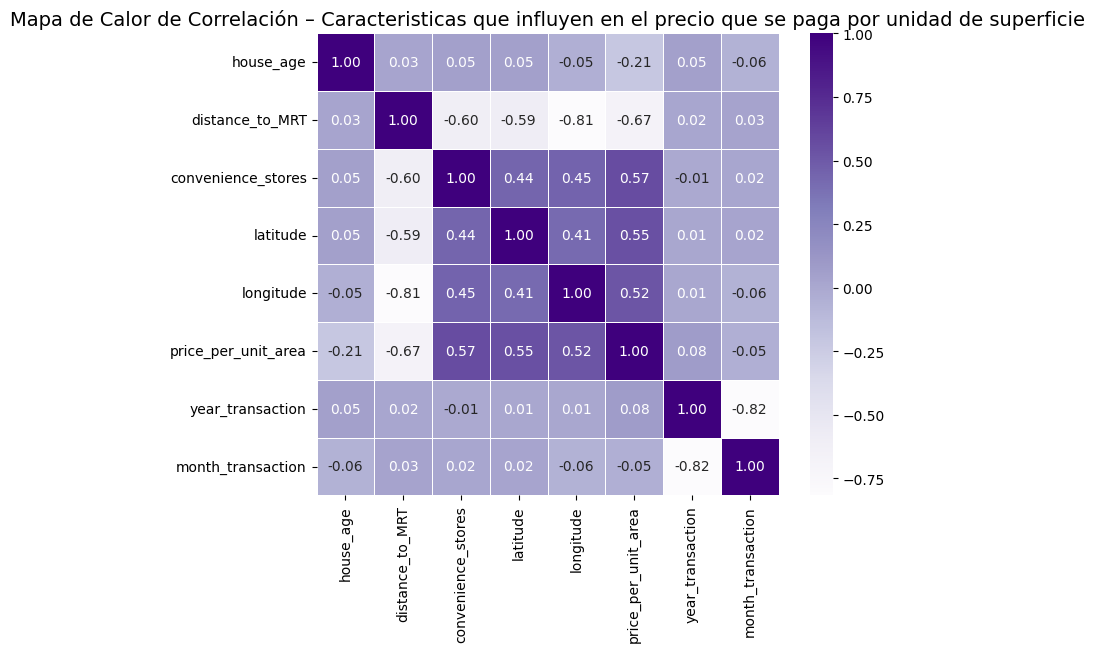

In [ ]:
# Se filtran las variables numéricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Calcula la matriz de correlación sólo con variables numéricas
matriz_correlacion = df_numerico.corr()

# Crea el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="Purples", square=True, linewidths=0.5)
plt.title("Mapa de Calor de Correlación – Caracteristicas que influyen en el precio que se paga por unidad de superficie", fontsize=14)
plt.show()

####Analisis
- Respecto a lo visualizado en el mapa de correlación las variables con correlación mas importante y que influyen en el precio son, acceso a metro(distance_to_mrt), cantidad de tiendas cercanas(convenience_store), y ubicacion geografica(latitud y longitud)
- La edad de la propiedad tiene un efecto negativo

## Diagnostico y Solución del Problema

###Diagnostico
- El dataset contiene info sobre propiedades que incluyen datos como  la ubicacion geografica, distancia entre estaciones de metro, cantidad de tiendas cercanas, fechas de transacción y edad de la propiedad.
- La variable objetivo price_per_unit_area es numerica continua y hace referencia al valor por unidad de superficie
- No existen valores nulos ni duplicados pero si existen valores outliers que se mantuvieron por ser valores posibles.
- Existen correlaciones importantes entre precio y edad de la vivienda, precio y distancia al transporte y precio con tiendas cercanas y ubicacion geografica.

###Selección del Problema
- La variables objetivo es continua y su prediccion permite estimar el valor de nuevas propiedades, identificar zonas de alto valor, se podria analizar posibles inversiones y planificación urbana.
- Dentro de los desafios es analizar aun más los valores atipicos a find e que a futuro no afecten los meodelos predictivos. Verificar el tratamiento de las variables geograficas, estre otras
- Finalmente se utilizará regresion como probelmatica principal con el objetivo de predecir el valor por unidad de superficie, algo parecido a valor por mt3.